<img src=".\logo_utn.svg" align="right" width="150">

# Tarea Semanal 4
### Autor: Tobías Guerrero

## Consigna

<img src=".\plantilla.png" align="center">

Basándose en la plantilla mostrada, se pide: 
1. Obtener la transferencia de máxima planicidad del filtro requerido.
2. Obtener el diagrama de polos y ceros, y un bosquejo de la respuesta en frecuencia. Comparar el diagrama de polos y ceros con el del filtro pasabajo prototipo.
3. Implementar el circuito normalizado con estructuras pasivas. 
4. Reemplazar los inductores en las estructuras pasivas mediante el GIC de Antoniou, en la configuración considerada más apropiada.

## 1. Obtención de la transferencia

La obtención de la transferencia se realizó mediante cálculos en papel. Los mismos se adjuntan en el anexo de este documento. 
Primero se halló la plantilla equivalente para un prototipo pasabajos. Luego, se diseñó un Butterworth del orden necesario recurriendo a la técnica de $\omega_{Butterworth}$, se desnormalizó y finalmente se aplicó el núcleo de transformación para obtener la transferencia pasaaltos objetivo.
La transferencia pasabajos, desnormalizada, obtenida fue:

$\large T_{LP(p)} = \frac{0,8}{p + 0,8} \cdot \frac{0,64}{p^{2} + 0,8 \cdot p + 0,64}$

Y la transferencia pasaaltos obtenida fue:

$\large T_{HP(s)} = \frac{0,8 \cdot s}{s + 0,8} \cdot \frac{0,64 \cdot s}{s^{2} + 0,8 \cdot s + 0,64}$

Luego, ambas transferencias se obtuvieron mediante simulación en Python. La misma se desarrolla a continuación.

In [1]:
# Se importan las librerias necesarias
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti
import numpy as np
from math import log, sqrt, ceil

In [2]:
# Se crean variables para los datos de la plantilla
amax = 1
amin = 30
fp = 1
fs = 4

In [3]:
# Se calculan epsilon al cuadrado, el orden n y la frecuencia de Butterworth
ee = 10**(amax/10) - 1
n = ceil(log(sqrt(((10**(amin/10))-1)/((10**(amax/10)-1))))/log(fs/fp))
omega_Butter = ee**(-1/(2*n))

In [4]:
# Se opera para hallar los polos de Butterworth del orden buscado
butter = np.zeros(2*n + 1)
butter[-1] = 1
butter[0] = -1

aa = np.roots(butter)
raices = aa[ np.real(aa) < 0 ]

poli1_0 = np.array([ 1, -raices[0] ])
poli1_1 = np.array([ 1, -raices[1] ])
poli1_2 = np.array([ 1, -raices[2] ])

In [5]:
# Se crea el polinomio del denominador
poli_aux = np.polymul(poli1_0,poli1_1)

den = np.polymul( poli_aux , poli1_2 )

In [6]:
# Se desnormaliza el denominador, dividiendo cada componente por la frecuencia de Butter elevada a la (n-orden)
# Se imprime en pantalla
# Se observa que los coeficientes coinciden con los hallados

for i in range(n+1):
    den[i] = den[i]/(omega_Butter**(i))

print(den)

[1.        +0.0000000e+00j 1.59670901+0.0000000e+00j
 1.27473983-1.4152455e-16j 0.50884714+0.0000000e+00j]


## 2. Diagrama de polos y ceros. Respuesta en frecuencia

Tanto el diagrama de polos y ceros obtenidos en papel se muestran en el anexo. 

Además, se verificó el resultado obtenido mediante simulación en Python. La misma se muestra a continuación

In [7]:
# Se crea el polinomio del numerador, primero para un pasabajos
num = den[-1]

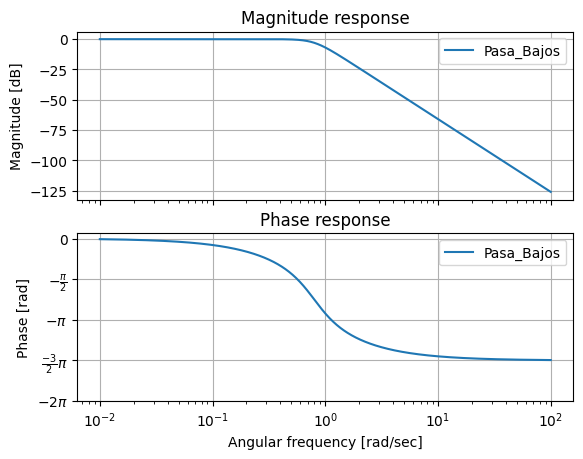

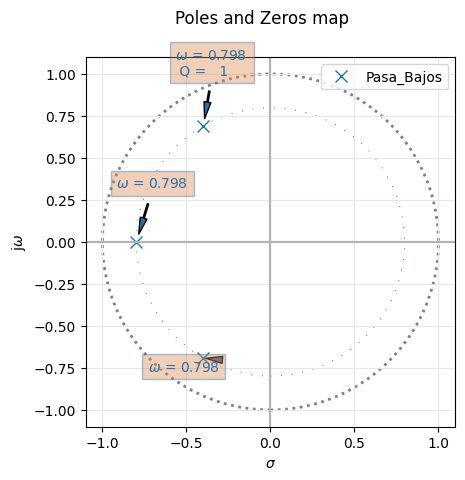

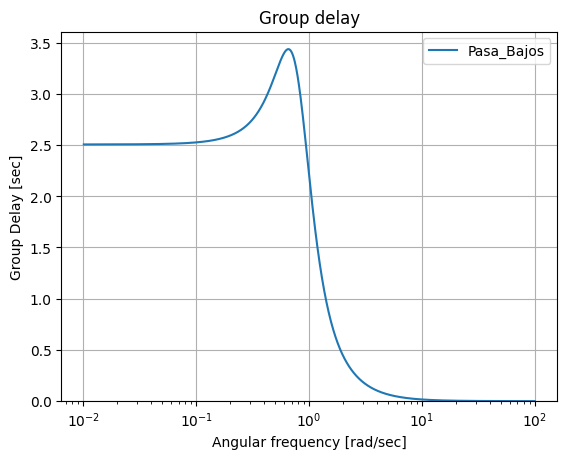

In [8]:
# Se crea la transferencia y se la analiza con la funcion analyze_sys

H = sig.TransferFunction( num , den )

analyze_sys(H,sys_name='Pasa_Bajos')

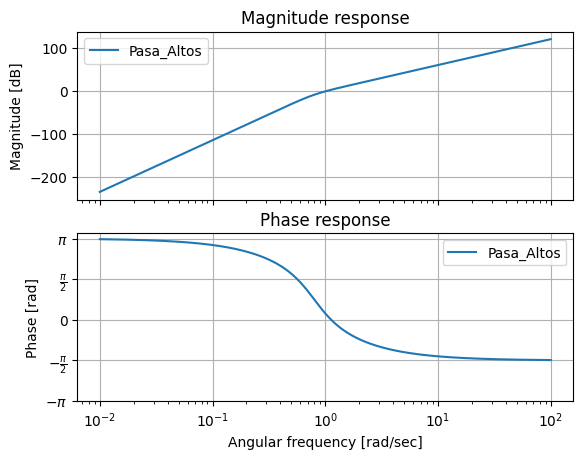

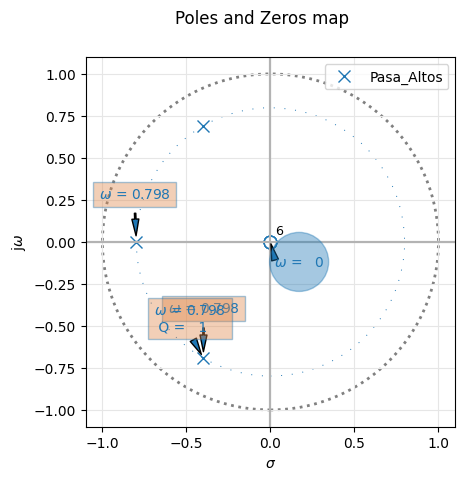

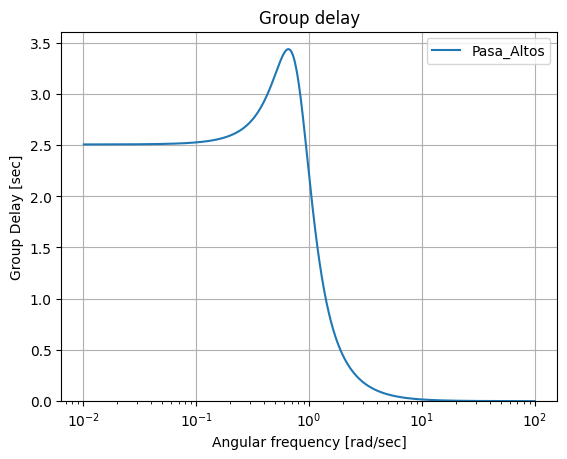

In [9]:
# Luego, se cambia el numerador para que se corresponda al de una transferencia pasaaltos y se repiten los gráficos

num = np.zeros(2*n + 1)
num[0] = den[0].real

H = sig.TransferFunction( num , den )

analyze_sys(H,sys_name='Pasa_Altos')

A modo de comparación, se observa que el diagrama de polos y ceros de la transferencia pasaaltos tiene un cero triple en el origen, ceros que pueden atribuirse al núcleo de transformación de pasabajos a pasaaltos, que convierten los ceros en infinito de la primera en ceros en el origen en la segunda.

## 3. Implementación

La transferencia obtenida se implementó en una etapa RL y una RLC con salida en el inductor, ambas separadas entre sí mediante un buffer.

Tomando como referencia la resistencia, de modo que $R = 1$, se obtuvieron valores de capacitor e inductores de $L = C = 1,25$.

A continuación se incluyen capturas del circuito implementado en LTSpice y los resultados obtenidos.

<img src=".\con_inductor.png" align="center">

<img src=".\res_conIND.png" align="center">

## 4. Implementación con GIC

<img src=".\gic.png" align="center">

Sabiendo que la admitancia de un GIC es $Y(s) = \frac{Y_{2} \cdot Y_{4}}{Y_{1} \cdot Y_{3} \cdot Y_{5}}$, para que esta estructura reemplace un inductor se necesita que alguna y sólo una de las admitancias pares sea un capacitor, y el resto, resistores. Eligiendo $Y_{4} = s \cdot C$, y diseñando para que la impedancia resultante coincida con la de los inductores a reemplazar, se obtiene el circuito que se muestra a continuación:

<img src=".\conGIC.png" align="center">

Los resultados obtenidos fueron idénticos a la implementación con inductores:

<img src=".\res_conGIC.png" align="center">

## Anexo: Cálculos en papel

<img src="papel.jpg" align="center">